# Введение в pytorch

**Вариант:** 14

### Установка pytorch

In [3]:
import torch
import numpy as np

In [4]:
# numpy 

x = np.arange(16).reshape(4, 4)

print(f'X :\n {x}')
print(f'add 5 :\n {x + 5}')
print(f'X*X^T  :\n {np.dot(x, x.T)}')
print(f'mean over cols :\n {x.mean(axis=-1)}')
print(f'cumsum of cols :\n {np.cumsum(x, axis=0)}' )

X :
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
add 5 :
 [[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
X*X^T  :
 [[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
mean over cols :
 [ 1.5  5.5  9.5 13.5]
cumsum of cols :
 [[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]


In [5]:
# pytorch 

x = np.arange(16).reshape(4, 4)

x = torch.from_numpy(x).type(torch.FloatTensor) #or torch.arange(0,16).view(4,4)

print(f'X :\n {x}')
print(f'add 5 :\n {x + 5}')
print(f'X*X^T  :\n {torch.matmul(x, x.transpose(1, 0))}')
print(f'mean over cols :\n {torch.mean(x, dim=-1)}')
print(f'cumsum of cols :\n {torch.cumsum(x, dim=0)}')

X :
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
add 5 :
 tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
 tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
 tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


### Util.py

In [6]:
import sys
import os
import time

import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt


def load_mnist(flatten=False):
    """taken from https://github.com/Lasagne/Lasagne/blob/master/examples/mnist.py"""
    # We first define a download function, supporting both Python 2 and 3.
    if sys.version_info[0] == 2:
        from urllib import urlretrieve
    else:
        from urllib.request import urlretrieve

    def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
        print("Downloading %s" % filename)
        urlretrieve(source + filename, filename)

    # We then define functions for loading MNIST images and labels.
    # For convenience, they also download the requested files if needed.
    import gzip

    def load_mnist_images(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the inputs in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        # The inputs are vectors now, we reshape them to monochrome 2D images,
        # following the shape convention: (examples, channels, rows, columns)
        data = data.reshape(-1, 1, 28, 28)
        # The inputs come as bytes, we convert them to float32 in range [0,1].
        # (Actually to range [0, 255/256], for compatibility to the version
        # provided at http://deeplearning.net/data/mnist/mnist.pkl.gz.)
        return data / np.float32(256)

    def load_mnist_labels(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the labels in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        # The labels are vectors of integers now, that's exactly what we want.
        return data

    # We can now download and read the training and test set images and labels.
    X_train = load_mnist_images('train-images-idx3-ubyte.gz')
    y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
    X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
    y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

    # We reserve the last 10000 training examples for validation.
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])

    # We just return all the arrays in order, as expected in main().
    # (It doesn't matter how we do this as long as we can read them again.)
    return X_train, y_train, X_val, y_val, X_test, y_test


def plot_embedding(X, y):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])

### NumPy vs Pytorch

In [7]:
x = torch.linspace(0, 2 * np.pi, 16, dtype=torch.float64)
out = torch.sin(x)**2 + torch.cos(x)**2
print(out.numpy())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Leaf vs Non-leaf Variable:

In [8]:
x = torch.tensor([1., 2., 3., 4.], requires_grad=True)  # leaf tensor
y = x + 1  # not a leaf variable

In [9]:
x = torch.tensor([1.], requires_grad=True)
y = x**2
print(x.requires_grad)
print(y.requires_grad)

with torch.no_grad():
    z = torch.exp(x)
    print(z.requires_grad)
    
# detach from the graph
w = torch.log(x).detach()
print(w.requires_grad)

True
True
False
False


### Пример линейной регрессии на датасете California

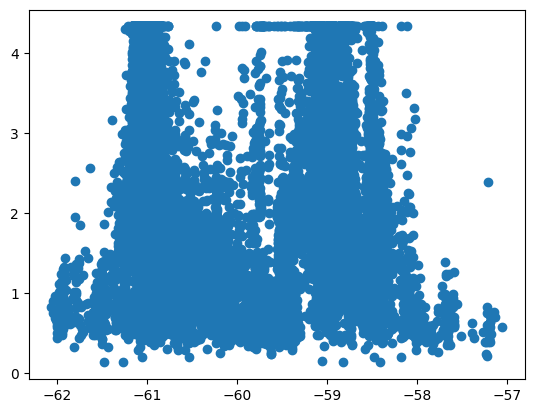

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

#select one column for simplicity. 
x = X[:, -1] / X[:, -1].std()
y = y / y.std()

plt.scatter(x, y);

In [20]:
# model tensors
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# data tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# все тензоры являются leaf-tensors
# x и y не требуют вычисления градиентов
for vv in [w, b, x, y]:
    print(vv.is_leaf, vv.requires_grad)

True True
True True
True False
True False


In [21]:
#try out gradients
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

loss.backward()

#now w.grad is a tensor containing gradient of L w.r.t. w

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

# no gradients for tensors with requires_grad=False
# and non-leaf tensors
print("Non-Leaf x dL/dx = \n", x.grad)
print("Non-Leaf loss dL/dpred = \n", y_pred.grad)

dL/dw = 
 tensor([214.0627])
dL/db = 
 tensor([-3.5852])
Non-Leaf x dL/dx = 
 None
Non-Leaf loss dL/dpred = 
 None


C:\Users\Dns\AppData\Local\Temp\ipykernel_17740\3846789532.py:15: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten\src\ATen/core/TensorBody.h:494.)
  print("Non-Leaf loss dL/dpred = \n", y_pred.grad)


### Градиенты промежуточных вершин

In [22]:
y_pred = w * x + b

# check this:
y_pred.retain_grad()

loss = torch.mean((y_pred - y)**2)
loss.backward()

print("Non-Leaf loss dL/dpred = \n", y_pred.grad[:10])

Non-Leaf loss dL/dpred = 
 tensor([-0.0004, -0.0003, -0.0003, -0.0003, -0.0003, -0.0002, -0.0003, -0.0002,
        -0.0002, -0.0002])


### Линейная регрессия

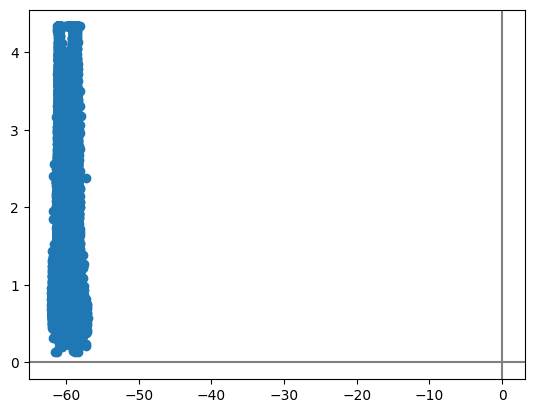

loss =  nan


In [24]:
from IPython.display import clear_output


# Assuming w and b are already defined

alpha = 0.1  # learning rate

for i in range(100):
    # compute loss
    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    
    # backpropagation
    loss.backward()
    
    # gradient descent step for weights and bias
    with torch.no_grad():
        w -= alpha * w.grad
        b -= alpha * b.grad
    
    # zero gradients
    w.grad.zero_()
    b.grad.zero_()
    
    # the rest of code is just bells and whistles
    if (i + 1) % 5 == 0:
        # draw linear regression prediction vs data
        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), y_pred.data.numpy(), color='orange')
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.5:
            print("Done!")
            break

### Оптимизаторы

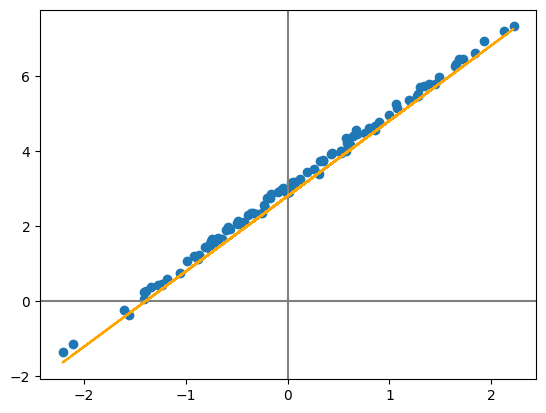

loss =  0.050856202840805054
Done!


In [26]:
torch.manual_seed(42)
x = torch.randn(100)  # Random input
y = 2 * x + 3 + 0.1 * torch.randn(100)  # Linear relationship with noise

# Model tensors
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Define optimizer
opt = torch.optim.RMSprop([w, b], lr=0.1)

for i in range(100):
    # Compute predictions
    y_pred = w * x + b
    
    # Compute loss
    loss = torch.mean((y_pred - y)**2)
    
    # Backpropagation and gradient descent
    loss.backward()
    opt.step()
    opt.zero_grad()
    
    # The rest of code is just bells and whistles
    if (i + 1) % 5 == 0:
        # Draw linear regression prediction vs data
        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), y_pred.data.numpy(), color='orange')
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.1:
            print("Done!")
            break

### Высокоуровневые API

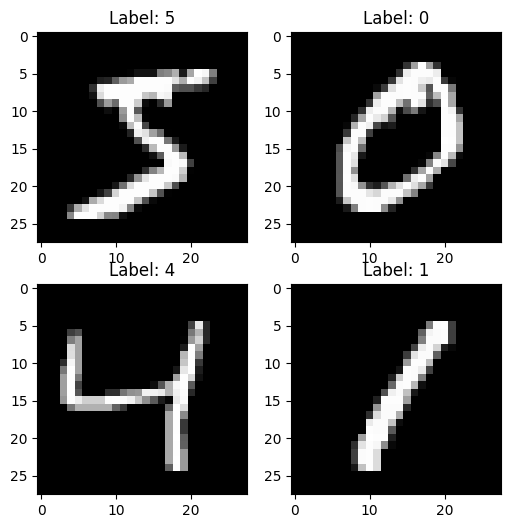

In [10]:
X_train, y_train, X_val, y_val, X_test, y_test = load_mnist(flatten=True)

plt.figure(figsize=[6, 6])
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title(f"Label: {y_train[i]}")
    plt.imshow(X_train[i].reshape([28, 28]), cmap='gray');

In [11]:
# Higher-level API:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, hidden_size=40):
        super(Net, self).__init__()
        # here you construct weights for layers
        self.fc1 = nn.Linear(X_train.shape[1], hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 10)
        
    def forward(self, x):
        # here you describe usage of layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # check log_softmax signature
        return F.log_softmax(x, dim=-1)
    # backward function computes automaticaly

In [12]:
# model interface:
model = Net()
tt = torch.from_numpy(X_train[:10, :].astype(np.float32))
output = model(tt)

print('Model outputs: \n', output)
# Получение вероятностей из output с помощью функции log_softmax из torch
probs = torch.nn.functional.log_softmax(output, dim=1)

# Получение предсказания из output с помощью функции argmax из torch
pred = torch.argmax(output, dim=1)

print('Probs: \n', probs)
print('Pred: \n', pred.data.numpy())
print('Truth: \n', y_train[:10])

Model outputs: 
 tensor([[-2.4336, -2.1431, -2.2292, -2.3600, -2.3888, -2.2198, -2.3165, -2.4163,
         -2.2728, -2.2857],
        [-2.4784, -2.1583, -2.2018, -2.3519, -2.3674, -2.2188, -2.3270, -2.4321,
         -2.2620, -2.2753],
        [-2.4491, -2.1779, -2.2165, -2.3617, -2.3764, -2.2148, -2.3117, -2.4384,
         -2.2383, -2.2828],
        [-2.4763, -2.1711, -2.1948, -2.3757, -2.3555, -2.2185, -2.3249, -2.4004,
         -2.2710, -2.2801],
        [-2.4887, -2.1823, -2.1961, -2.3628, -2.3486, -2.2164, -2.3193, -2.4260,
         -2.2498, -2.2812],
        [-2.4674, -2.1976, -2.1898, -2.3920, -2.3428, -2.2339, -2.3354, -2.3995,
         -2.2296, -2.2782],
        [-2.4607, -2.1503, -2.2093, -2.3660, -2.3744, -2.2117, -2.3224, -2.4285,
         -2.2665, -2.2820],
        [-2.4493, -2.1774, -2.1801, -2.3912, -2.4021, -2.2137, -2.3531, -2.3656,
         -2.2596, -2.2772],
        [-2.4672, -2.1539, -2.1984, -2.3609, -2.3715, -2.2185, -2.3252, -2.4338,
         -2.2653, -2.2783],
  

In [13]:
from IPython.display import clear_output
from tqdm.auto import tqdm

# функция для итераций по минибатчам
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in tqdm(range(0, len(inputs) - batchsize + 1, batchsize)):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [14]:
def train(model, optimizer, batchsize=32):
    loss_log = []
    model.train()
    for x_batch, y_batch in iterate_minibatches(X_train, y_train, batchsize=batchsize, shuffle=True):
        # data preparation
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        # compute gradients
        loss.backward()
        # make a step
        optimizer.step()
        loss = loss.item()
        loss_log.append(loss)
    return loss_log


# TODO: написать функцию для валидации по X_val, y_val
# hint: optimizer не нужен
def test(model):
    loss_log = []
    model.eval()
    with torch.no_grad():  # гарантирует, что градиенты не будут вычисляться при валидации
        data = torch.from_numpy(X_val.astype(np.float32))
        target = torch.from_numpy(y_val.astype(np.int64))
        output = model(data)
        loss = F.nll_loss(output, target)
        loss_log.append(loss.item())
    return loss_log


In [15]:
def plot_history(train_loss, val_loss, val_steps, epoch):
    plt.figure()
    plt.plot(train_loss, label='train', zorder=5)
    plt.scatter(val_steps, val_loss, label='val', marker='+', color='orange', zorder=10, s=200)
    plt.title('Loss at {} epoch'.format(epoch))
    plt.xlabel('Train Steps')
    plt.grid()
    plt.legend()
    plt.show()

  0%|          | 0/1562 [00:00<?, ?it/s]

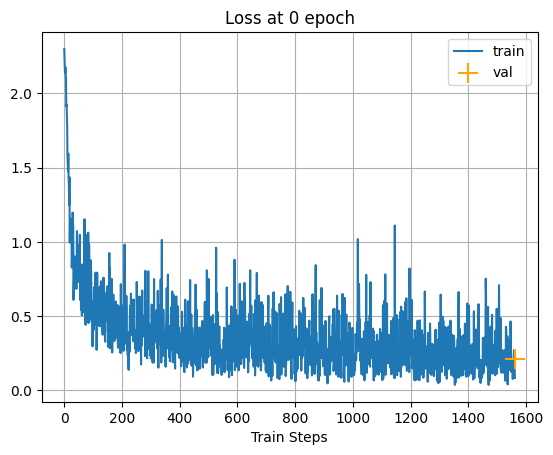

  0%|          | 0/1562 [00:00<?, ?it/s]

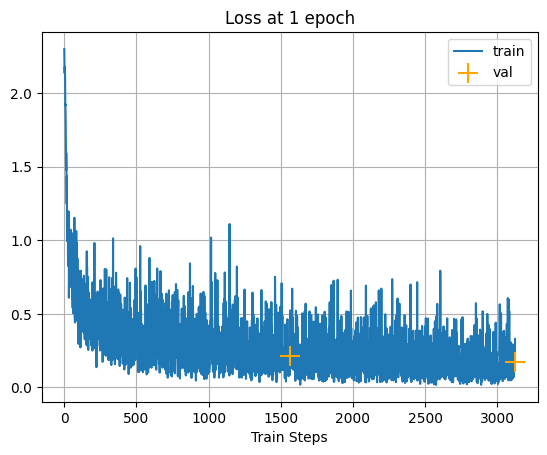

  0%|          | 0/1562 [00:00<?, ?it/s]

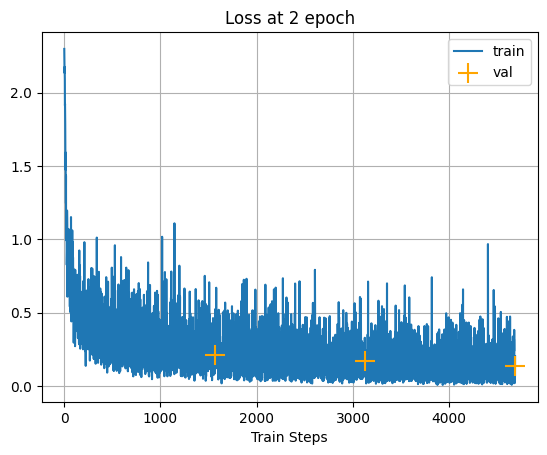

  0%|          | 0/1562 [00:00<?, ?it/s]

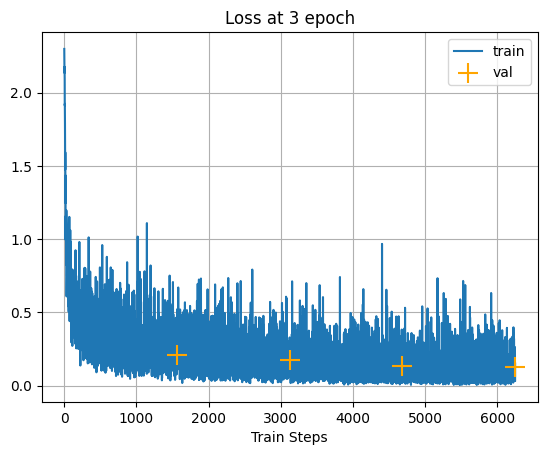

  0%|          | 0/1562 [00:00<?, ?it/s]

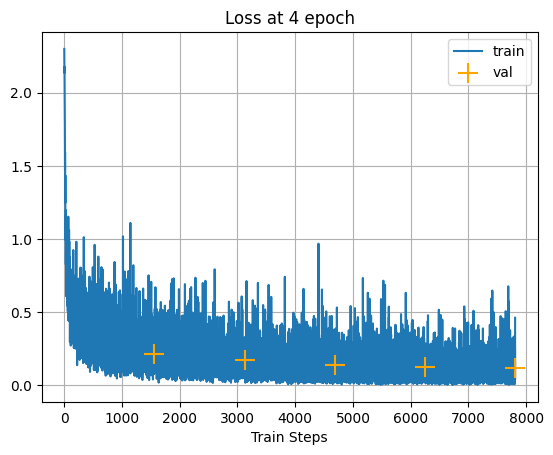

  0%|          | 0/1562 [00:00<?, ?it/s]

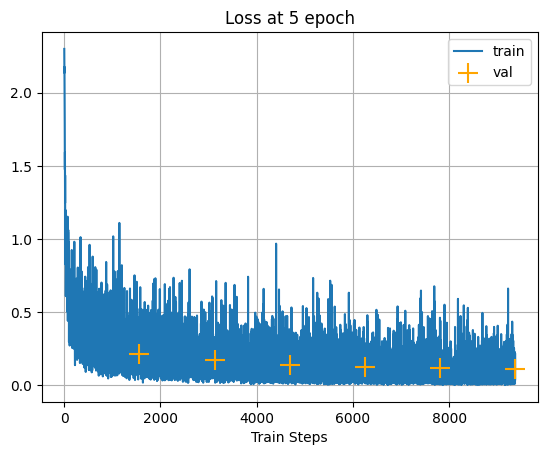

  0%|          | 0/1562 [00:00<?, ?it/s]

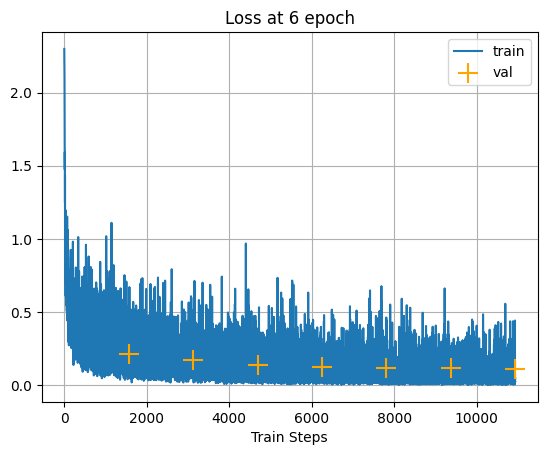

  0%|          | 0/1562 [00:00<?, ?it/s]

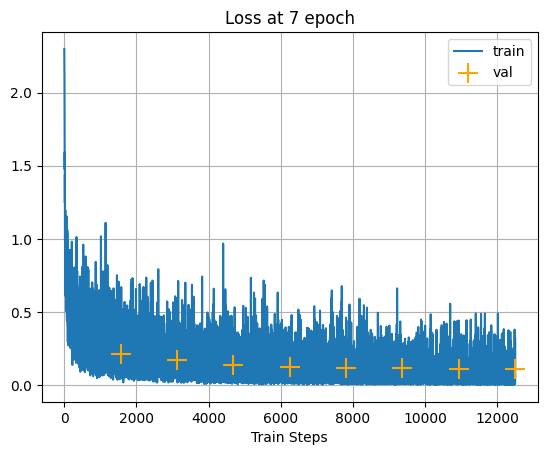

  0%|          | 0/1562 [00:00<?, ?it/s]

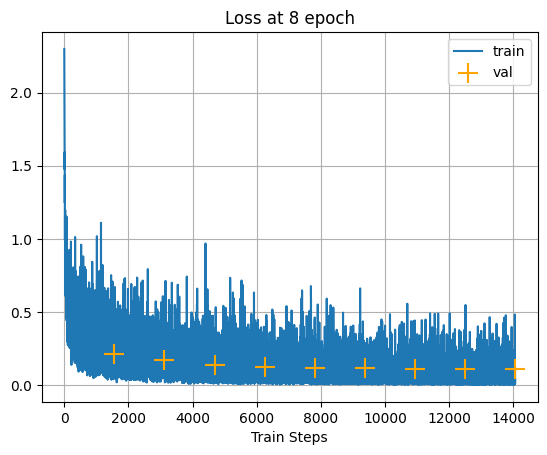

  0%|          | 0/1562 [00:00<?, ?it/s]

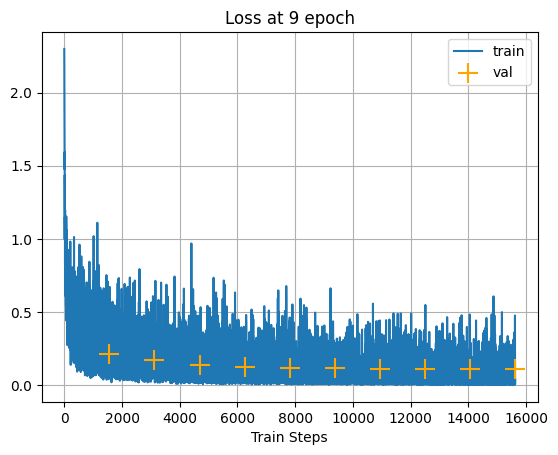

[0.03742337226867676, 0.2900902032852173, 0.025112289935350418, 0.07295594364404678, 0.00827062502503395, 0.005188668146729469, 0.09414810687303543, 0.002371886046603322, 0.01730569452047348, 0.045499615371227264, 0.07003428041934967, 0.037905678153038025, 0.012396629899740219, 0.06661345809698105, 0.048191096633672714, 0.08501404523849487, 0.11797721683979034, 0.01270347461104393, 0.005788798909634352, 0.11628538370132446, 0.009936115704476833, 0.2874572277069092, 0.10346581041812897, 0.20299848914146423, 0.26627272367477417, 0.07596179842948914, 0.003109176177531481, 0.05015064403414726, 0.009234782308340073, 0.04329890012741089, 0.11025886237621307, 0.10432397574186325, 0.11460428684949875, 0.07512716203927994, 0.01031525619328022, 0.02301621250808239, 0.10430605709552765, 0.044267620891332626, 0.003960033878684044, 0.04855846241116524, 0.06937883049249649, 0.0988452211022377, 0.014914974570274353, 0.10739769041538239, 0.027733664959669113, 0.016032636165618896, 0.005400534719228744

In [17]:
train_log = []
val_log = []
val_steps = []
# train_steps = []

model = Net()
opt = torch.optim.RMSprop(model.parameters(), lr=0.001)
batchsize = 32

for epoch in range(10):
    train_loss = train(model, opt, batchsize=batchsize)
    train_log.extend(train_loss)
    # train_steps.extend([epoch]*len(train_loss))
    
    val_loss = np.mean(test(model))
    val_log.append(val_loss)
    val_steps.append((epoch + 1) * len(train_loss))  # assuming each epoch corresponds to a validation step

        
    # TODO: график train_loss vs train_steps с точками val_loss vs trained_steps
    plot_history(train_log, val_log, val_steps, epoch)
    # use your plot_history()
    
    # hint: train_log and val_log may contain data with different shapes
print(train_loss)

### Метрики

  0%|          | 0/1562 [00:00<?, ?it/s]

C:\Users\Dns\AppData\Local\Temp\ipykernel_21164\2943098829.py:38: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:212.)
  inputs, labels = torch.from_numpy(X_val), torch.from_numpy(y_val)


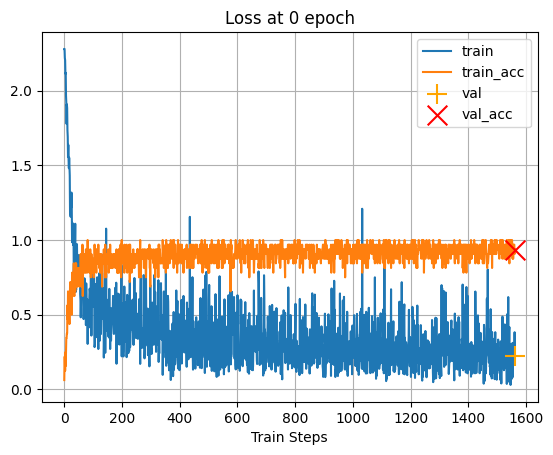

  0%|          | 0/1562 [00:00<?, ?it/s]

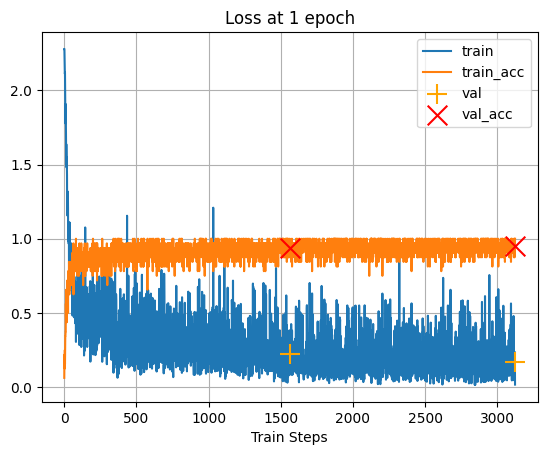

  0%|          | 0/1562 [00:00<?, ?it/s]

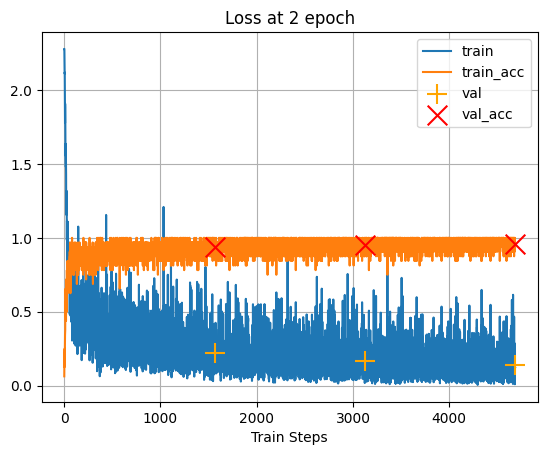

  0%|          | 0/1562 [00:00<?, ?it/s]

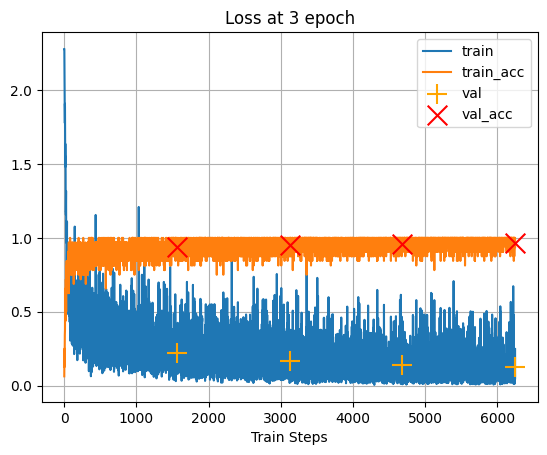

  0%|          | 0/1562 [00:00<?, ?it/s]

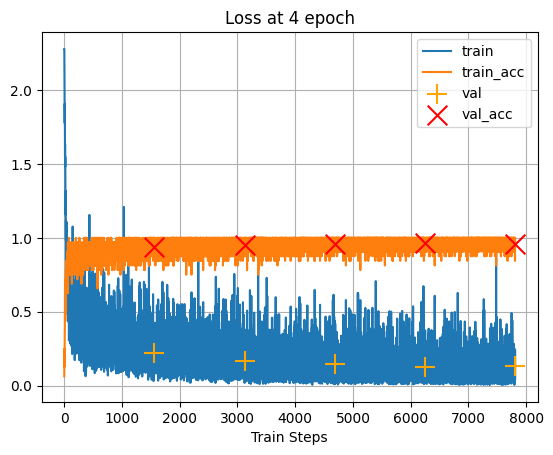

  0%|          | 0/1562 [00:00<?, ?it/s]

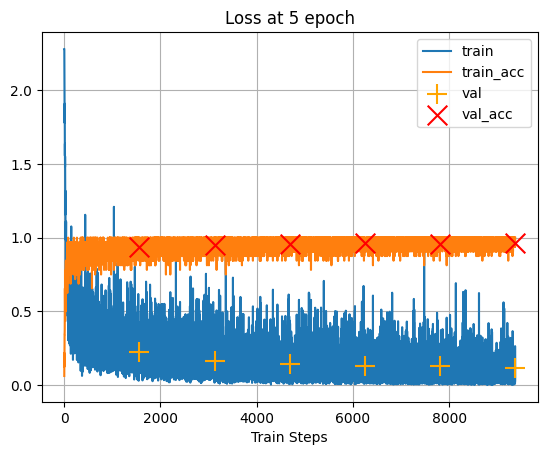

  0%|          | 0/1562 [00:00<?, ?it/s]

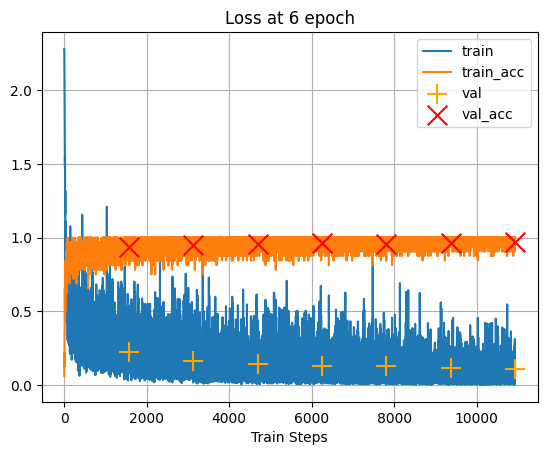

  0%|          | 0/1562 [00:00<?, ?it/s]

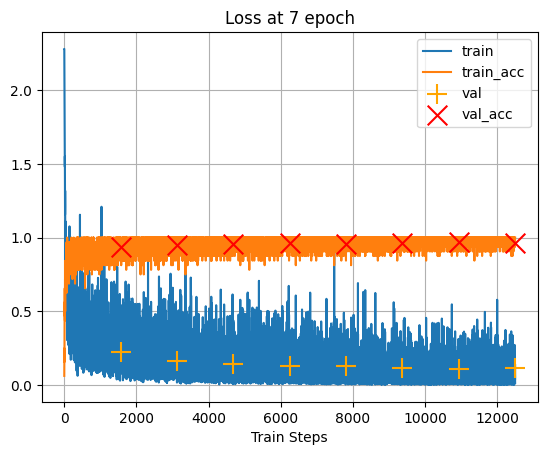

  0%|          | 0/1562 [00:00<?, ?it/s]

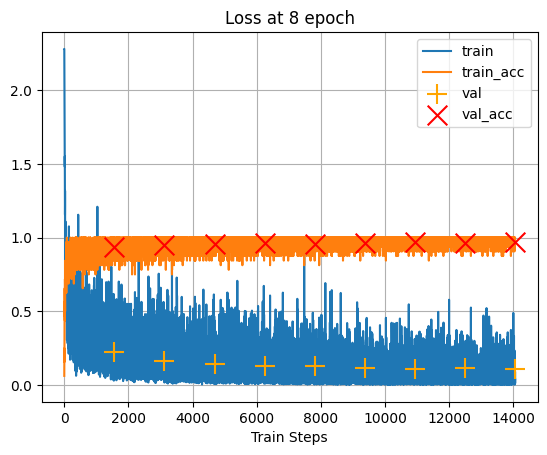

  0%|          | 0/1562 [00:00<?, ?it/s]

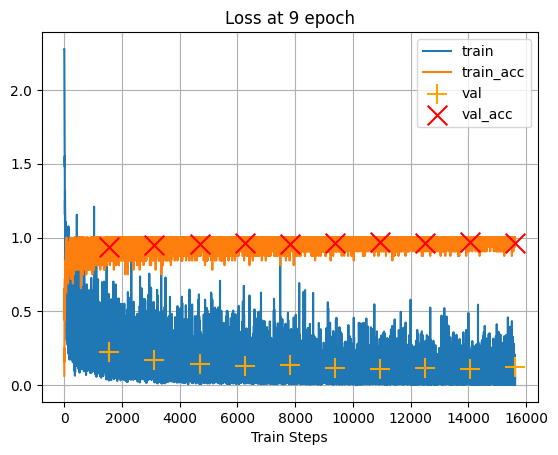

In [18]:
# TODO: добавьте подсчет точности:
def train(model, optimizer, batchsize=32):
    loss_log, acc_log = [], []
    model = model
    model.train()
    for x_batch, y_batch in iterate_minibatches(X_train, y_train, batchsize=batchsize, shuffle=True):
        # data preparation
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        # compute gradients
        loss.backward()
        # make a step
        optimizer.step()
        loss = loss.item()
        loss_log.append(loss)

        # accuracy
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct = pred.eq(target.view_as(pred)).sum().item()
        acc = correct / batchsize
        acc_log.append(acc)

    return loss_log, acc_log


# TODO: добавьте подсчет точности:
def test(model):
    loss_log, acc_log = [], []
    model.eval()
    criterion = nn.CrossEntropyLoss()
    
    with torch.no_grad():
        inputs, labels = torch.from_numpy(X_val), torch.from_numpy(y_val)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss_log.append(loss.item())

        # accuracy
        _, predicted = torch.max(outputs.data, 1)
        total = labels.size(0)
        correct = (predicted == labels).sum().item()
        acc = correct / total
        acc_log.append(acc)

    return loss_log, acc_log


def plot_history(train_loss, val_loss, epoch, train_acc, val_acc, val_steps):
    plt.figure()
    plt.plot(train_loss, label='train', zorder=5)
    plt.plot(train_acc, label='train_acc', zorder=5)
    plt.scatter(val_steps, val_loss, label='val', marker='+', color='orange', zorder=10, s=200)
    plt.scatter(val_steps, val_acc, label='val_acc', marker='x', color='red', zorder=10, s=200)
    plt.title('Loss at {} epoch'.format(epoch))
    plt.xlabel('Train Steps')
    # plt.ylabel('Loss')
    plt.grid()
    plt.legend()
    plt.show()

train_log, train_acc_log = [], []
val_log, val_acc_log = [], []
val_steps = []

model = Net()
opt = torch.optim.RMSprop(model.parameters(), lr=0.001)
batchsize = 32


for epoch in range(10):
    # train
    train_loss, train_acc = train(model, opt, batchsize=batchsize)
    # test
    val_loss, val_acc = test(model)
    # store metrics
    train_log.extend(train_loss)
    train_acc_log.extend(train_acc)
    val_acc_log.append(val_acc)
    val_log.append(val_loss)
    val_steps.append((epoch + 1) * len(train_loss)) 

        
    # plot all metrics (loss and acc for train/val)
    plot_history(train_log, val_log, epoch, train_acc_log, val_acc_log, val_steps)

### Загрузчик данных

In [4]:
import urllib.request

url = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
filename = "hymenoptera_data.zip"
urllib.request.urlretrieve(url, filename)

('hymenoptera_data.zip', <http.client.HTTPMessage at 0x1c43ec1a830>)

In [5]:
import zipfile

zip_file = "hymenoptera_data.zip"
extract_folder = "hymenoptera_data"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

In [7]:
%matplotlib inline

import time
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

from torchvision import datasets, models, transforms
from torch.optim import lr_scheduler


data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

use_gpu = torch.cuda.is_available()
plt.ion()


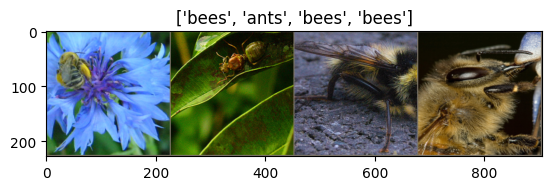

In [9]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.1)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [10]:
# обратите внимание на сохранение лучшей версии весов сети
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # Set model to training mode
            else:
                model.train(False)  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for data in dataloaders[phase]:
                # get the inputs
                inputs, labels = data

                if use_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += loss.item()
                running_corrects += torch.sum(preds == labels).type(torch.float)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
        
        time_elapsed = time.time() - since
        print('Elapsed {:.0f}m {:.0f}s\n'.format(time_elapsed // 60, time_elapsed % 60))

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [11]:
# torchvision содержит ряд моделей с претрейненными весами:
[m for m in dir(models) if not m.startswith('_')]

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [14]:
model_ft = models.resnet18(pretrained=True)
# hint: вы можете изучить устройство любого объекта в python пользуясь интерактивностью интерпретатора и методом dir()

# Список слоев модели можно получить с помощью обхода
# for x in model_ft.named_modules():
#    print(x[0], x[1])

# TODO: подмените в модели последний слой, чтобы она работала для двух классов

num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)



# TODO: выберите, какие параметры дообучать. Результат получается лучше если дообучать всё или только последний слой? Почему?
# например, выключить обучение всех параметров можно при помощи этого кода:
for params in model_ft.parameters():
    params.requires_grad = True 

params_to_train = model_ft.fc.parameters()

# use GPU if you have it
if use_gpu:
    model_ft = model_ft.cuda()

# loss
criterion = nn.CrossEntropyLoss()

# Create optimizer on the selected parameters
optimizer_ft = optim.SGD(params_to_train, lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)


In [15]:
model_ft = train_model(
    model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)
# если всё сделано правильно, то точность на валидации должна быть больше 94%

Epoch 0/24
----------
train Loss: 0.1815 Acc: 0.6434
val Loss: 0.0733 Acc: 0.8954
Elapsed 1m 27s

Epoch 1/24
----------
train Loss: 0.1259 Acc: 0.7746
val Loss: 0.0520 Acc: 0.9281
Elapsed 2m 55s

Epoch 2/24
----------
train Loss: 0.1307 Acc: 0.7541
val Loss: 0.0499 Acc: 0.9281
Elapsed 4m 22s

Epoch 3/24
----------
train Loss: 0.1224 Acc: 0.7869
val Loss: 0.0432 Acc: 0.9477
Elapsed 5m 50s

Epoch 4/24
----------
train Loss: 0.1191 Acc: 0.7664
val Loss: 0.0517 Acc: 0.9216
Elapsed 7m 18s

Epoch 5/24
----------
train Loss: 0.1111 Acc: 0.7951
val Loss: 0.0470 Acc: 0.9542
Elapsed 8m 46s

Epoch 6/24
----------
train Loss: 0.1099 Acc: 0.7869
val Loss: 0.0427 Acc: 0.9542
Elapsed 10m 14s

Epoch 7/24
----------
train Loss: 0.0972 Acc: 0.8607
val Loss: 0.0543 Acc: 0.9150
Elapsed 11m 42s

Epoch 8/24
----------
train Loss: 0.0711 Acc: 0.8730
val Loss: 0.0427 Acc: 0.9542
Elapsed 13m 9s

Epoch 9/24
----------
train Loss: 0.1009 Acc: 0.8238
val Loss: 0.0449 Acc: 0.9216
Elapsed 14m 37s

Epoch 10/24
-----

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


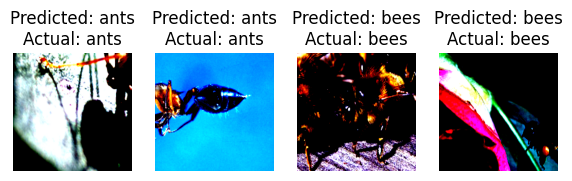

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


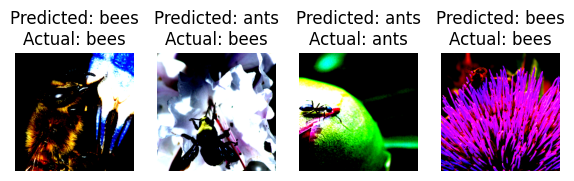

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


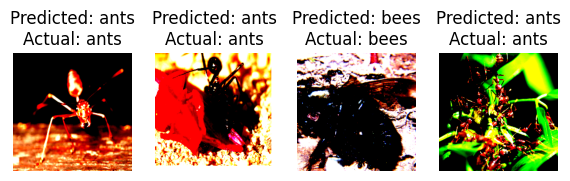

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


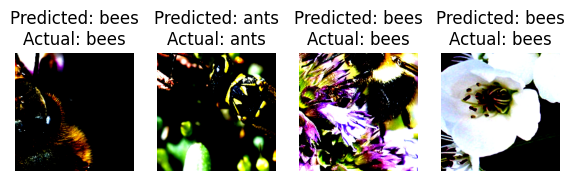

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


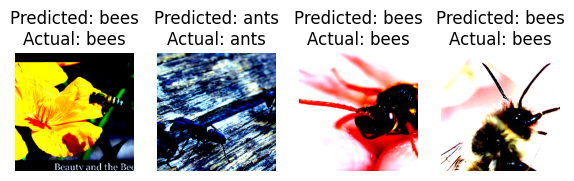

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


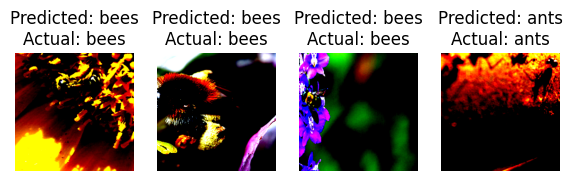

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


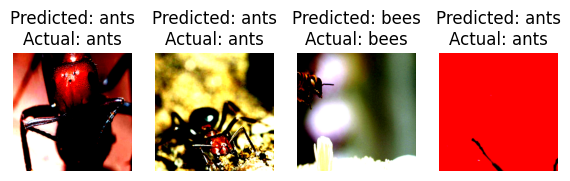

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


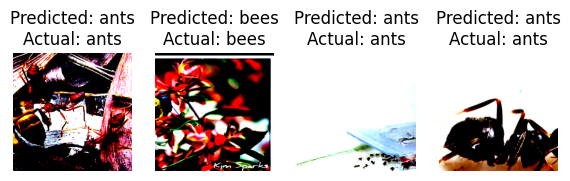

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


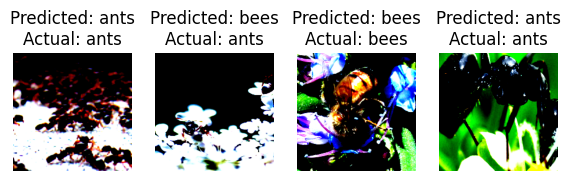

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


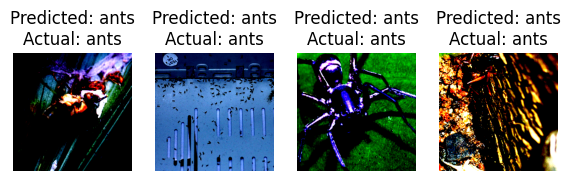

In [17]:
# TODO: напишите функцию, прогоняющую модель на нескольких примерах из валидационной выборки
# Отобразите картинки и предсказания

def visualize(model, dataloader, num_images=10):
    model.eval()
    class_names = dataloader.dataset.classes
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader):
            if i >= num_images:
                break
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            fig = plt.figure(figsize=(18, 6))
            for j in range(inputs.size(0)):
                plt.subplot(1, num_images, j+1)
                plt.imshow(inputs.cpu().data[j].numpy().transpose((1, 2, 0)))
                plt.title(f'Predicted: {class_names[preds[j]]}\nActual: {class_names[labels[j].item()]}')
                plt.axis('off')
                
            plt.show()
            
visualize(model_ft, dataloaders['train'])